# Loading DATA

In [1]:
import numpy as np 
import pandas as pd 
import random 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
numerical_convertible_columns = ["Net Sales Units", "Net Sales", "Cost", "Gross Margin", "Item was Scanned",
                              "Dynamic\nPromo ID","Dynamic Promo ID", "Actual Price", "Retail Price", "$ Off Retail", "Line #"]


## Converting object columns to numerical
def convert_to_float(x):
  if x=="" or x in numerical_convertible_columns:
    return 0
  return float(x.replace(',',''))

##Removing % sign from Gross Margin Column Data
def p2f(x):
  if x=='' or x == "Gross Margin " or x == "Gross Margin %":
    return 0
  temp = x.strip('%') if x[-1] == "%" else x
  return float(temp.replace(',',''))

##Removing $ or () sign from Actual-Retail Column Data
def dollar_to_float(x):
  if x=="" or x == "Actual-Retail" or x == "Dynamic\nPromo ID" or x == "Dynamic Promo ID":
    return 0
  temp = x.strip(')') if x[-1] == ")" else x
  temp = temp[1:]  if temp[0] == '(' else temp
  temp = temp[1:]  if temp[0] == '$' else temp
  if x[0] == "-":
    return -1* dollar_to_float(temp[1:])
  else:
    return float(temp.replace(',',''))

In [3]:
data1718 = pd.read_csv("costello_ace_2017-2018.csv", 
                         thousands=',', converters={'Gross Margin %':p2f, 'Actual-Retail': dollar_to_float,
                                                    'Net Sales Units' : convert_to_float, 
                                                    "Net Sales" : convert_to_float, "Cost" : convert_to_float, 
                                                    "Gross Margin" :convert_to_float, "Item was Scanned": convert_to_float,
                              "Dynamic Promo ID": convert_to_float, "Actual Price":convert_to_float, 
                              "Retail Price":convert_to_float, "$ Off Retail":convert_to_float, "Line #":convert_to_float})

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data1718.shape

(17328044, 39)

In [5]:
data1718.tail()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
17328039,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,82901105411,10541,"PALMYRA PUSHBROOM 18""",1.0,...,7.29,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,2.0,Sale,Category Price Plan,NaN
17328040,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,82901121725,12172,WIRE BRUSH MINI SS 3PK,1.0,...,3.78,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,3.0,Sale,Category Price Plan,NaN
17328041,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,41785997888,1455567,BRUSH SCRUB HANG-UP,1.0,...,1.56,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,4.0,Sale,Category Price Plan,NaN
17328042,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,8.2091E+11,2301166,CM SLIDE LOCK KNIFE,1.0,...,4.82,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,5.0,Sale,Category Price Plan,NaN
17328043,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [6]:
data1516 = pd.read_csv("costello_ace_2015-2016.csv", 
                         thousands=',', converters={'Gross Margin %':p2f, 'Actual-Retail': dollar_to_float,
                                                    'Net Sales Units' : convert_to_float, 
                                                    "Net Sales" : convert_to_float, "Cost" : convert_to_float, 
                                                    "Gross Margin" :convert_to_float, "Item was Scanned": convert_to_float,
                              "Dynamic Promo ID": convert_to_float, "Actual Price":convert_to_float, 
                              "Retail Price":convert_to_float, "$ Off Retail":convert_to_float, "Line #":convert_to_float})

In [7]:
data1516.shape

(15627499, 39)

In [8]:
pd.set_option('display.max_columns',
              500)

data1516.tail()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
15627494,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,51643061880,8009730,"CORD STRETCH 48"" HVY DTY",1.0,2.10,1.68,0.42,20.00,80,SPORTING GOODS,856,STRETCH CORDS/TARP STRAPS,85601,STRETCH CORDS/HOOKS,1.0,NaN,NaN,0.0,2.10,5.99,3.89,Y,Alternate Tender,3.89,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,1.0,Sale,Category Price Plan,NaN
15627495,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,82901731900,73190,TARP POLY BLUE/BRN 6X8,1.0,3.06,2.45,0.61,19.93,70,"LAWN, GARDEN & FARM SUPPLIES",774,TARPS,77401,POLY TARPS,1.0,NaN,NaN,0.0,3.06,7.99,4.93,Y,Alternate Tender,4.93,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,2.0,Sale,Category Price Plan,NaN
15627496,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,42854024986,1365527,SPRAYER ORBITAL 24 OZ,1.0,2.00,1.60,0.40,20.00,10,CLEANING SUPPLIES,105,GLASS/PLASTIC CLEANERS,10505,SPRAYERS,1.0,NaN,NaN,0.0,2.00,3.99,1.99,Y,Alternate Tender,1.99,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,3.0,Sale,Category Price Plan,NaN
15627497,9/30/2016,21:29:00,507179,B84423,S,16147 CALDWELL,49000007640,CO5964,SPRITE 20OZ,1.0,1.19,0.95,0.24,20.17,9,SODA/ETC,927,CANDY AND FOODS,92706,BEVERAGES,1.0,NaN,NaN,0.0,1.19,1.99,0.80,Y,Alternate Tender,0.80,7063,NaN,1.9818e+09,GEORGE TAYLOR,Sale,1.0,Sale,Category Price Plan,NaN
15627498,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


# Cleaning Data

In [9]:
def find_rows_having_values_as_their_column_names(column_name, rows_to_be_deleted):
  rows_to_be_deleted += data1516.index[data1516[column_name] == column_name].tolist()

rows_to_be_deleted_1 = [15627498]
for col in data1516.columns:
  find_rows_having_values_as_their_column_names(col, rows_to_be_deleted_1)

print(len(np.unique(rows_to_be_deleted_1)))

def find_rows_having_values_as_their_column_names(column_name, rows_to_be_deleted):
  rows_to_be_deleted += data1718.index[data1718[column_name] == column_name].tolist()

rows_to_be_deleted_2 = [17328043]
for col in data1718.columns:
  find_rows_having_values_as_their_column_names(col, rows_to_be_deleted_2)

print(len(np.unique(rows_to_be_deleted_2)))

/usr/local/lib/python3.5/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


24
24


In [10]:
print(data1516.shape)
temp_df_1 = data1516.drop(rows_to_be_deleted_1)
print(temp_df_1.shape)

(15627499, 39)
(15627475, 39)


In [11]:
print(data1718.shape)
temp_df_2 = data1718.drop(rows_to_be_deleted_2)
print(temp_df_2.shape)

(17328044, 39)
(17328020, 39)


In [12]:
data1516 = temp_df_1
data1718 = temp_df_2

In [13]:
import gc
del temp_df_1, temp_df_2
gc.collect()

0

In [14]:
##Zip Code has 'NY'

# numerical_convertible_columns = ["Net Sales Units", "Net Sales", "Cost", "Gross Margin", "Item was Scanned",
#                               "Dynamic Promo ID", "Actual Price", "Retail Price", "$ Off Retail", "Line #"]

# def RepresentsInt(s):
#   try: 
#     train_data[s].astype(str).str.replace(",","").astype(float) 
#     return True
#   except Exception as e:
#     print(s)
#     print(str(e))
#     return False
# num =[]  
# for v in numerical_convertible_columns:
#   if RepresentsInt(v):
#     num.append(v)
# num

## CLEANING 2015-16

In [15]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

time data 'Grand Summaries' does not match format '%m/%d/%Y' (match)


In [16]:
data1516.loc[data1516['Date'] == 'Grand Summaries']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
2198827,Grand Summaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5721680,Grand Summaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [17]:
# data1516.iloc[data1516['Date'] == 'Grand Summaries']
droplist = data1516.index[data1516['Date'] == 'Grand Summaries'].tolist()
print(droplist)

[2198827, 5721680]


In [18]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [19]:
droplist = data1516.index[data1516['Date'] == 'Count = 682060'].tolist()
print(droplist)

[2198828]


In [20]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [21]:
data1516.index[data1516['Date'] == 'Count = 682060'].tolist()

[]

In [22]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

time data 'Count = 483724' does not match format '%m/%d/%Y' (match)


In [23]:
droplist = data1516.index[data1516['Date'] == 'Count = 483724'].tolist()
print(droplist)

[5721681]


In [24]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [25]:
data1516.index[data1516['Date'] == 'Count = 483724'].tolist()

[]

In [26]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

In [27]:
data1516.shape

(15627471, 39)

## CLEANING 2017-18

In [28]:
try:
    pd.to_datetime(data1718['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

In [29]:
data1718.shape

(17328020, 39)

## COMBINING DATAFRAMES 

In [30]:
frames = [data1516,data1718]
train_data = pd.concat(frames).reset_index(drop=True)

In [31]:
train_data.shape

(32955491, 39)

In [32]:
data1516.shape

(15627471, 39)

In [33]:
data1718.shape

(17328020, 39)

In [32]:
train_data.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
0,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05481X,REG SEL INT MATTE BS1 GL,3.0,119.97,82.29,37.68,31.41,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,1.0,Sale,Category Price Plan,NaN
1,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05482X,REG SEL INT MATTE BS2 GL,2.0,79.98,51.52,28.46,35.58,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN
2,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901090779,2106912,BLADE CUTOFF 4.5X1/16MTL,4.0,11.96,3.48,8.48,70.90,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,1.0,Sale,Retail,NaN
3,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,8.85911E+11,2361640,CUT WHL4-1/2X.045 MTL,8.0,23.92,6.36,17.56,73.41,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,2.0,Sale,Retail,NaN
4,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901265313,7315054,GLOVE LTHR PALM WRK 3PK,1.0,14.99,5.46,9.53,63.58,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,14.99,14.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,3.0,Sale,Retail,NaN


In [33]:
train_data[train_data.index.duplicated()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


In [34]:
import gc
#del data1516, data1718
gc.collect()

0

In [35]:
try:
  pd.to_datetime(train_data['Transaction Time'], format='%H:%M:%S', errors='raise')
except Exception as e:
  print(e)

In [36]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Customer Number         107
Scanned UPC          174798
Department Code          89
Class Code           429338
Class Name                3
Fineline Code       4126931
MIP Promo ID       27901181
Promo/Discount     25975311
Tender Type               1
Zip Code           10473835
Zip Plus-4         12815651
Loyalty ID         10324840
Clerk                   936
Pricing Source        50922
Return Code        31832090
dtype: int64

In [34]:
def find_cols():
  cat_columns = []
  num_columns = []
  for i in train_data.columns:
    if train_data[i].dtype=='object' :
      cat_columns.append(i)
    else:
      num_columns.append(i)
  print("-----------Numerical Columns------------")
  print(num_columns)
  print("----------Categorical Columns-----------")
  print(cat_columns)

find_cols()

-----------Numerical Columns------------
['Net Sales Units', 'Net Sales', 'Cost', 'Gross Margin', 'Gross Margin %', 'Item was Scanned', 'Dynamic Promo ID', 'Actual Price', 'Retail Price', 'Actual-Retail', '$ Off Retail', 'Line #']
----------Categorical Columns-----------
['Date', 'Transaction Time', 'Customer Number', 'Receipt Number', 'Store #', 'Store Name', 'Scanned UPC', 'Item Number', 'Item Description', 'Department Code', 'Department Name', 'Class Code', 'Class Name', 'Fineline Code', 'Fineline Name', 'MIP Promo ID', 'Promo/Discount', 'Taxable', 'Tender Type', 'Zip Code', 'Zip Plus-4', 'Loyalty ID', 'Clerk', 'Item Type', 'Line Item Transaction Type', 'Pricing Source', 'Return Code']


# IMPUTING NANs

## Customer Number

In [35]:
train_data[train_data["Customer Number"]=="*5"]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
2,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901090779,2106912,BLADE CUTOFF 4.5X1/16MTL,4.0,11.96,3.48,8.48,70.90,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,1.0,Sale,Retail,NaN
3,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,8.85911E+11,2361640,CUT WHL4-1/2X.045 MTL,8.0,23.92,6.36,17.56,73.41,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,2.0,Sale,Retail,NaN
4,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901265313,7315054,GLOVE LTHR PALM WRK 3PK,1.0,14.99,5.46,9.53,63.58,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,14.99,14.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,3.0,Sale,Retail,NaN
5,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901720836,72083,GLOVE LTHR PALM LG,1.0,4.99,2.10,2.89,57.92,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,4.99,4.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,4.0,Sale,Retail,NaN
6,4/1/2015,7:31:55,*5,E89651,B,14252 ISLAND PARK,82901069294,1099332,SANDSPONG MED WEDG ACE,1.0,3.99,0.91,3.08,77.19,14,PAINT & PAINT SUPPLIES,150,HAND/POWER SANDING ABRASI,15003,HAND SANDING ACCESSORIES,1.0,NaN,NaN,0.0,3.99,3.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,GABRIELA PARATORE,Sale,1.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955463,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,3.0,2.67,1.07,1.60,59.93,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.89,0.00,0.89,Y,Alternate Tender,-0.89,NaN,NaN,NaN,SUSAN MAURICE,Sale,2.0,Sale,Manual Override,NaN
32955464,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,2.0,2.00,0.80,1.20,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,1.00,0.00,1.00,Y,Alternate Tender,-1.00,NaN,NaN,NaN,SUSAN MAURICE,Sale,3.0,Sale,Manual Override,NaN
32955465,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,2.0,0.98,0.39,0.59,60.20,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.49,0.00,0.49,Y,Alternate Tender,-0.49,NaN,NaN,NaN,SUSAN MAURICE,Sale,4.0,Sale,Manual Override,NaN
32955484,9/30/2018,18:21:20,*5,B02347,I,15110 GARDEN CITY PARK,76706844002,7104888,TRAP SPIDER & CRICKET PK,2.0,13.98,5.38,8.60,61.52,70,"LAWN, GARDEN & FARM SUPPLIES",750,INSECTICIDES/REPELLENTS,75004,INSECT BAITS/TRAPS,1.0,2082918,S,0.0,6.99,8.99,2.00,Y,Alternate Tender,2.00,NaN,NaN,NaN,MARK SMILOWITZ,Sale,1.0,Sale,Promotion,NaN


In [36]:
train_data["Customer Number"] = train_data["Customer Number"].fillna("*5")

In [37]:
train_data[train_data["Customer Number"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Store #

In [38]:
print(train_data["Store #"].unique().tolist())

['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']


In [39]:
len(train_data["Store Name"].unique().tolist())

32

## Scanned UPC

In [40]:
train_data[train_data["Scanned UPC"].str.isalpha()==True]['Scanned UPC'].unique()

array(['OTHER', 'QF', 'LOGS', 'AUTO', 'ROUNDUP', 'GGARDEN', 'GGIFT',
       'RAZZLE', 'ISMERCH', 'GSNOW', 'HARDBOARD', 'STDPINE', 'GPAINT',
       'GOURDS', 'HAYBALE', 'FBWETMOP', 'JGSOIL', 'SPECIAL'], dtype=object)

In [41]:
item_nums = train_data[train_data.index.isin(train_data.index[train_data["Scanned UPC"].isnull()].tolist())]["Item Number"].unique().tolist()
scan = train_data[train_data["Item Number"].isin(item_nums)]["Scanned UPC"].tolist()
items = train_data[train_data["Item Number"].isin(item_nums)]["Item Number"].tolist()
mapping = dict(zip(items, scan))
temp = train_data[train_data["Scanned UPC"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
69,4/1/2015,7:58:56,88820,4298,P,15784 EI PAINT,NaN,12992,PAINTBRS CHIP 1.5WT BRSL,4.0,5.72,0.83,4.89,85.49,14,PAINT & PAINT SUPPLIES,131,PAINT BRUSHES,13106,SINGLE USE/TOSS-AWAY,1.0,NaN,Q,0.0,1.43,1.79,0.36,Y,Charge Tender,0.36,11730,NaN,1.98202e+09,"HENRY ""HANK"" SCHURMAN",Sale,2.0,Sale,Category Price Plan,NaN
130,4/1/2015,8:05:32,10000,A35835,P,15784 EI PAINT,NaN,1081249,SHERLOCK EXT POLE 2-4',1.0,31.49,14.14,17.35,55.10,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17111,EXTENSION POLES,1.0,NaN,NaN,0.0,31.49,34.99,3.50,Y,Bankcard Tender,3.50,NaN,NaN,1.98149e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN
369,4/1/2015,8:31:49,*5,A35840,P,15784 EI PAINT,NaN,73705834,.5 MIL 9X12 DROP 5PK,1.0,6.99,3.11,3.88,55.51,14,PAINT & PAINT SUPPLIES,139,DROP CLOTHS,13901,PLASTIC,1.0,NaN,NaN,0.0,6.99,6.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,"HENRY ""HANK"" SCHURMAN",Sale,1.0,Sale,Retail,NaN
370,4/1/2015,8:31:49,*5,A35840,P,15784 EI PAINT,NaN,1395151,"DELUXE METAL TRAY 11""",1.0,5.99,2.19,3.80,63.44,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17110,TRAYS AND FRAMES,1.0,NaN,NaN,0.0,5.99,5.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,"HENRY ""HANK"" SCHURMAN",Sale,2.0,Sale,Retail,NaN
820,4/1/2015,9:10:22,*5,F19982,E,14664 NORTH MASSAPEQUA,NaN,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,1.0,6.00,2.40,3.60,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,1.0,NaN,NaN,0.0,6.00,0.00,6.00,Y,Cash Tender,-6.00,NaN,NaN,NaN,MICHELLE LYNAM STRIBULA,Sale,1.0,Sale,Manual Override,NaN


In [42]:
train_data[train_data["Scanned UPC"].isnull()]["Scanned UPC"] = temp["Item Number"].map(mapping)
train_data.shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(32955491, 39)

In [43]:
import gc
del temp
gc.collect()

0

## Item Number

In [44]:
train_data[train_data['Item Number']=="56"][['Item Number', 'Item Description', 'Scanned UPC']]

,Item Number,Item Description,Scanned UPC
54,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
55,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
56,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
90,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
91,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
...,...,...,...
32955461,56,FASTENERS,OTHER
32955462,56,FASTENERS,OTHER
32955463,56,FASTENERS,OTHER
32955464,56,FASTENERS,OTHER


## Department Code

In [45]:
dept_names = train_data[train_data.index.isin(train_data.index[train_data["Department Code"].isnull()].tolist())]["Department Name"].unique().tolist()
dept_code = train_data[train_data["Department Name"].isin(dept_names)]["Department Code"].tolist()
dept = train_data[train_data["Department Name"].isin(dept_names)]["Department Name"].tolist()
mapping = dict(zip(dept, dept_code))
temp = train_data[train_data["Department Code"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
3422832,12/2/2016,9:37:34,*A94K5,I45809,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,21037,1957,1.90118e+09,UNKNOWN CLERK KMCPOS,Sale,4.0,Sale,Promotion,NaN
3423209,12/2/2016,9:47:34,*AC9TK,I45817,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,50.0,0.01,49.99,99.98,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130B,S,200.0,50.0,0.0,50.0,Y,Bankcard Tender,-50.0,21144,1907,1.93344e+09,UNKNOWN CLERK KMCPOS,Sale,3.0,Sale,Promotion,NaN
3468908,12/3/2016,11:44:14,*AB3Z5,I46680,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,50.0,0.01,49.99,99.98,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130B,S,200.0,50.0,0.0,50.0,Y,Bankcard Tender,-50.0,21035,2230,1.9222e+09,UNKNOWN CLERK AAMPOS,Sale,3.0,Sale,Promotion,NaN
3474239,12/3/2016,12:31:18,*AC2YH,I46795,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,20711,9672,1.92857e+09,UNKNOWN CLERK RMLPOS,Sale,4.0,Sale,Promotion,NaN
3490432,12/3/2016,14:48:58,*A96T6,I47083,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,NaN,NaN,NaN,UNKNOWN CLERK AAMPOS,Sale,4.0,Sale,Promotion,NaN


In [46]:
mapping

{'BLANK': nan}

In [47]:
train_data["Department Code"] = train_data["Department Code"].fillna("NaN")

In [48]:
train_data[train_data["Department Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Class Name

In [49]:
item_nums = train_data[train_data.index.isin(train_data.index[train_data["Class Name"].isnull()].tolist())]["Item Number"].unique().tolist()
class_names = train_data[train_data["Item Number"].isin(item_nums)]["Class Name"].tolist()
items = train_data[train_data["Item Number"].isin(item_nums)]["Item Number"].tolist()
mapping = dict(zip(items, class_names))
temp = train_data[train_data["Class Name"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
21062605,2/2/2018,14:38:03,4250,18101,G,14874 WEST BABYLON,OTHER,1802628D,CARPET DRYER FAN 4.8A,1.0,251.99,163.20,88.79,35.24,10,CLEANING SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,251.99,279.99,28.0,Y,Charge Tender,28.0,11704,NaN,1.98173e+09,DOROTHY MARANO,Sale,1.0,Sale,Category Price Plan,NaN
24181335,7/30/2018,9:10:15,2045,I36840,2,7504 GRAND BLVD,OTHER,1839141D,"TUCK POINT BLADE 4.5""",1.0,30.59,15.25,15.34,50.15,14,PAINT & PAINT SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,30.59,33.99,3.4,N,Bankcard Tender,3.4,11729,NaN,1.98173e+09,TIMOTHY CONDRA,Sale,7.0,Sale,Category Price Plan,NaN
31472263,10/24/2018,11:10:39,2045,I43307,2,7504 GRAND BLVD,OTHER,1839141D,"TUCK POINT BLADE 4.5""",1.0,31.49,15.25,16.24,51.57,14,PAINT & PAINT SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,31.49,34.99,3.5,N,Bankcard Tender,3.5,11729,NaN,1.98173e+09,TIMOTHY CONDRA,Sale,22.0,Sale,Category Price Plan,NaN


In [50]:
mapping

{'1802628D': nan, '1839141D': nan}

In [51]:
train_data["Class Name"] = train_data["Class Name"].fillna("NaN")

In [52]:
train_data[train_data["Class Name"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Class Code 

In [53]:
item_nums = train_data[train_data["Class Code"].isnull()]['Class Name'].unique().tolist()
item_nums

['BLANK']

In [54]:
train_data[train_data['Class Name']=='BLANK'].shape

(429338, 39)

In [55]:
train_data["Class Code"] = train_data["Class Code"].fillna("NaN")

In [56]:
train_data[train_data["Class Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Fineline Name

In [57]:
train_data[train_data["Fineline Name"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


In [58]:
train_data[train_data["Fineline Code"].isnull()].shape

(4126931, 39)

In [59]:
item_nums = train_data[train_data["Fineline Code"].isnull()]['Fineline Name'].unique().tolist()
item_nums

['BLANK']

In [60]:
train_data["Fineline Code"] = train_data["Fineline Code"].fillna("NaN")

In [61]:
train_data[train_data["Fineline Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Customer Number

In [62]:
len(train_data[train_data['Customer Number'].str.startswith('*')][train_data['Zip Code'].isnull()])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


10300357

In [63]:
train_data[train_data['Customer Number']=='*5'][~train_data['Zip Code'].isnull()]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
190323,4/11/2015,11:34:42,*5,H78772,F,14822 NORTHPORT,7.2865E+11,4567756,"STEEL FIREPIT 26""",1.0,29.99,27.29,2.70,9.00,46,HEATING & COOLING SUPPLIES,456,PATIO HEATERS & FIREPITS,45602,OUTDOOR GAS FIREPITS,1.0,1150409,S,0.0,29.99,44.99,15.0,Y,Cash Tender,15.0,11729,4402,1.90591e+09,KATHLEEN GORNEY,Sale,1.0,Sale,Promotion,NaN
281154,4/14/2015,14:38:13,*5,F02120,B,14252 ISLAND PARK,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,1.0,0.10,0.04,0.06,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.10,0.00,0.1,Y,Cash Tender,-0.1,11729,4402,1.90591e+09,GABRIELA PARATORE,Sale,1.0,Sale,Manual Override,NaN
1891047,8/17/2016,15:55:26,*5,A75011,U,16354 LINCOLN PARK,073187670120,8036592,HTH SUPER CLARIFIER QT,1.0,14.99,6.89,8.10,54.04,80,SPORTING GOODS,855,POOL CHEMICALS & MAINTENA,085501,POOL CHEMICALS,1.0,NaN,NaN,0.0,14.99,14.99,0.0,Y,Alternate Tender,0.0,11729,4402,1.90591e+09,PATRICK RICHARDSON,Sale,1.0,Sale,Retail,NaN
1891048,8/17/2016,15:55:26,*5,A75011,U,16354 LINCOLN PARK,855989006242,EA1173,MICRO NYLON WIRE 3'-ASST,1.0,4.99,2.00,2.99,59.92,30,"FLASHLIGHTS, LIGHTING & SUPPLIES",369,PHONE ACCESSORIES,036904,PHONE ACCESSORIES,1.0,NaN,NaN,0.0,4.99,4.99,0.0,Y,Alternate Tender,0.0,11729,4402,1.90591e+09,PATRICK RICHARDSON,Sale,2.0,Sale,Retail,NaN
2241706,8/2/2015,17:14:11,*5,G32659,B,14252 ISLAND PARK,77924074158,8212698,"QCC1 HOSE & REGULATOR21""",1.0,34.99,13.68,21.31,60.90,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86906,GAS GRILL PARTS,1.0,NaN,NaN,0.0,34.99,34.99,0.0,Y,Bankcard Tender,0.0,11729,4402,1.90591e+09,AMANDA COMPETIELLO,Sale,1.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27360731,5/13/2017,16:15:50,*5,158827,Y,16663 EDGEWATER,OTHER,56,FASTENERS,1.0,0.00,0.00,0.00,0.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.00,0.00,0.0,Y,No Tender,0.0,11729,4402,1.90591e+09,LUKE ROLEN,Sale,1.0,Sale,Manual Override,NaN
28489593,5/21/2018,10:44:36,*5,J76940,W,16660 GLEN BURNIE,OTHER,700793,2CF RED COLORED MULCH,2.0,8.98,4.66,4.32,48.11,70,"LAWN, GARDEN & FARM SUPPLIES",746,BAG PRODUCTS,74610,DECO MULCH - LARGE BAG,5.0,NaN,NaN,0.0,4.49,4.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,CECILIA FINSTAD,Sale,1.0,Sale,Retail,NaN
28882584,11/4/2017,12:11:12,*5,D01093,7,12168 WEST ISLIP,45242098439,2340495,"HAMMER BIT 1/8""X1-1/2""X3",1.0,8.49,4.12,4.37,51.47,20,HAND TOOLS & TOOL ACCESSORIES,252,POWER DRILL BITS,25202,MASONRY/GLASS BITS,1.0,NaN,NaN,0.0,8.49,8.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,FRANK MENDOLIA,Sale,1.0,Sale,Retail,NaN
28882586,11/4/2017,12:11:12,*5,D01093,7,12168 WEST ISLIP,45242098514,2339968,"HAMMER BIT 5/16""X4""X6""",1.0,8.49,3.18,5.31,62.54,20,HAND TOOLS & TOOL ACCESSORIES,252,POWER DRILL BITS,25202,MASONRY/GLASS BITS,1.0,NaN,NaN,0.0,8.49,8.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,FRANK MENDOLIA,Sale,2.0,Sale,Retail,NaN


## Loyalty ID

In [64]:
train_data["Loyalty ID"] = train_data["Loyalty ID"].fillna("NaN")

## Clerk

In [65]:
train_data[train_data['Clerk'].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
24235995,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,8.43518E+11,81960,BBQ TOOL SET 3PC SS/WOOD,1.0,9.41,7.84,1.57,16.68,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86901,BBQ TOOL SETS,1.0,NaN,NaN,0.0,9.41,17.99,8.58,Y,Bankcard Tender,8.58,11702,NaN,1.98149e+09,NaN,Sale,1.0,Sale,Category Price Plan,NaN
24235996,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,7.83988E+11,8395568,PIGS ASS RUB SEASON6.5OZ,1.0,4.97,4.14,0.83,16.70,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86909,NO LONGER IN USE,1.0,NaN,NaN,0.0,4.97,7.99,3.02,N,Bankcard Tender,3.02,11702,NaN,1.98149e+09,NaN,Sale,2.0,Sale,Category Price Plan,NaN
24235997,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,32076894184,3013349,"STAPLE COAXL WH 1/4""CD50",1.0,1.69,1.41,0.28,16.57,34,ELECTRICAL SUPPLIES,316,STRAPS/STAPLES/CONNECTORS,31604,STAPLES,1.0,NaN,NaN,0.0,1.69,5.99,4.30,Y,Bankcard Tender,4.30,11702,NaN,1.98149e+09,NaN,Sale,3.0,Sale,Category Price Plan,NaN
24235998,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,82901001898,4008561,RING WAX EXTENDER KIT,1.0,4.63,3.85,0.78,16.85,40,PLUMBING SUPPLIES & FIXTURES,409,TOILET REPAIR,40901,WAX GASKET RINGS,1.0,NaN,NaN,0.0,4.63,8.99,4.36,Y,Bankcard Tender,4.36,11702,NaN,1.98149e+09,NaN,Sale,4.0,Sale,Category Price Plan,NaN
24236070,6/1/2017,13:09:59,509135,I82269,G,14874 WEST BABYLON,6.1127E+11,9274655,RED BULL ENRGY DRNK 12OZ,1.0,2.59,2.16,0.43,16.60,94,NOTIONS & MISCELLANEOUS,927,CANDY AND FOODS,92706,BEVERAGES,1.0,NaN,NaN,0.0,2.59,4.19,1.60,Y,Cash Tender,1.60,11726,NaN,1.9818e+09,NaN,Sale,1.0,Sale,Category Price Plan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27844143,5/30/2017,10:48:37,*5,I81641,G,14874 WEST BABYLON,OTHER,56,FASTENERS,1.0,0.30,0.12,0.18,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.30,0.00,0.30,Y,Cash Tender,-0.30,NaN,NaN,NaN,NaN,Sale,2.0,Sale,Manual Override,NaN
27844197,5/30/2017,10:50:28,202081,I81642,G,14874 WEST BABYLON,37155675746,4258141,CARTRIDGE MOEN PLSTC LL,-1.0,-19.99,-7.73,-12.26,61.33,40,PLUMBING SUPPLIES & FIXTURES,401,FAUCET PARTS,40101,STEMS,1.0,NaN,NaN,0.0,19.99,19.99,0.00,Y,Bankcard Tender,0.00,11704,7914,1.91582e+09,NaN,Return,1.0,Return,Return Validation,W
27844710,5/30/2017,11:06:52,198063,I81646,G,14874 WEST BABYLON,82901010517,5011887,TIP LEG PLST WHT1-1/4CD4,-1.0,-2.99,-0.75,-2.24,74.92,50,HARDWARE,540,FLOOR PROTECTION,54003,FURNITURE TIPS,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,11757,5416,1.91514e+09,NaN,Defective,1.0,Defective,Return Validation,D
27844711,5/30/2017,11:06:52,198063,I81646,G,14874 WEST BABYLON,82901010517,5011887,TIP LEG PLST WHT1-1/4CD4,-2.0,-5.98,-1.50,-4.48,74.92,50,HARDWARE,540,FLOOR PROTECTION,54003,FURNITURE TIPS,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,11757,5416,1.91514e+09,NaN,Return,3.0,Return,Return Validation,W


In [68]:
import gc
del temp
gc.collect()

11

In [81]:
print(len(data1516['Store #'].unique()))
print(len(data1718['Store #'].unique()))

print(len(train_data['Store #'].unique()))

29
31
32


In [78]:
grp = train_data.groupby(['Store #','Receipt Number'])
#grpp = data1718.groupby(['Store #','Receipt Number'])

In [79]:
print(grp.count().shape[0])

13378901


In [83]:
print(sorted(data1516['Store #'].unique().tolist()))
print(sorted(data1718['Store #'].unique().tolist()))

print(sorted(train_data['Store #'].unique().tolist()))

['1', '2', '3', '4', '6', '7', '8', '9', 'A', 'B', 'D', 'E', 'F', 'G', 'I', 'J', 'K', 'L', 'M', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X', 'Y']
['1', '2', '3', '4', '6', '7', '8', '9', 'A', 'B', 'E', 'F', 'G', 'I', 'J', 'K', 'L', 'M', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'a', 'z']
['1', '2', '3', '4', '6', '7', '8', '9', 'A', 'B', 'D', 'E', 'F', 'G', 'I', 'J', 'K', 'L', 'M', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'a', 'z']


In [ ]:
2015 - D, 
2017- no D, add a and z
#Store D has no recorded sales in 2017-2018
#Stores a and z might have been incepted in 2017-2018

In [90]:
non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']
print(len(train_data['Department Name'].unique()))

89


In [87]:
non_items_dept_new = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL','NO CHARGE SKU DEPT','BOTTLE DEPOSIT','DONTATIONS','REPAIRS','DELIVERY & UPS']
print(len(train_data['Department Name'].unique())-len(non_items_dept))

57


In [91]:
td1 = data1516[~data1516['Department Name'].isin(non_items_dept)]

In [92]:
td2 = data1718[~data1718['Department Name'].isin(non_items_dept_new)]

In [93]:
td3 = train_data[~train_data['Department Name'].isin(non_items_dept_new)]

In [94]:
td1.shape

(14725900, 39)

In [105]:
print(pd.to_datetime(train_data['Date']).max())
print(pd.to_datetime(train_data['Date']).min())

2018-12-31 00:00:00
2015-01-01 00:00:00


In [108]:
(train_data[train_data['Store #']=='D'].head(2))

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
791,4/1/2015,9:08:44,*5,G95487,D,CLOSED CENTEREACH,82901220275,22027,CYLINDER PROPANE14.1OZ,1.0,3.49,2.95,0.54,15.47,20,HAND TOOLS & TOOL ACCESSORIES,266,PROPANE KITS/FUEL/ACCS,26602,PROPANE FUEL,1.0,NaN,NaN,0.0,3.49,3.49,0.0,Y,Cash Tender,0.0,NaN,NaN,NaN,SALVATORE R,Sale,1.0,Sale,Retail,NaN
851,4/1/2015,9:12:42,161657,G95488,D,CLOSED CENTEREACH,74660015209,8107294,REMOVERBUG/TAR TRIGR SPR,1.0,6.99,3.06,3.93,56.22,84,AUTOMOTIVE,805,AUTO APPEARANCE CHEMICALS,80513,BUG & TAR REMOVER,1.0,NaN,NaN,0.0,6.99,6.99,0.0,Y,Bankcard Tender,0.0,11720,3649,1.91236e+09,SALVATORE R,Sale,1.0,Sale,Retail,NaN


In [109]:
stored = train_data[train_data['Store #']=='D'][['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']]

In [118]:
print(stored.head(2))

    Customer Number Item Number Receipt Number Store #   Loyalty ID  \
791              *5       22027         G95487       D          NaN   
851          161657     8107294         G95488       D  1.91236e+09   

     Gross Margin  Gross Margin %  
791          0.54           15.47  
851          3.93           56.22  


In [111]:
ace_d = stored[stored['Loyalty ID']!="NaN"]
nonace_d = stored[stored['Loyalty ID']=="NaN"]

In [114]:
print(ace_d.shape,nonace_d.shape)

(152628, 7) (171778, 7)


In [116]:
print(ace_d['Gross Margin'].sum(),nonace_d['Gross Margin'].sum())

453416.57 301719.14


In [119]:
others = train_data[train_data['Store #']!='D'][['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']]

MemoryError: Unable to allocate array with shape (12, 32631085) and data type float64

In [ ]:
ace_d = others[others['Loyalty ID']!="NaN"]
nonace_d = others[others['Loyalty ID']=="NaN"]
print(ace_d.shape,nonace_d.shape)

In [ ]:
print(ace_d['Gross Margin'].sum(),nonace_d['Gross Margin'].sum())

# ACE and NON ACE membership analysis

In [102]:
all = (train_data['Department Name'].unique()).tolist()
all

{'UNKNOWN DEPT 96', 'UNKNOWN DEPT 22', 'POWER TOOLS & ACCESSORIES', 'UNKNOWN DEPT 18', 'UNKNOWN DEPT 74', 'UNKNOWN DEPT 42', 'NO CHARGE SKU DEPT', 'BOTTLE DEPOSIT', 'UNKNOWN DEPT 89', 'UNKNOWN DEPT 81', 'SPORTING GOODS', 'APPLIANCES & HOME ENTERTAINMENT', 'UNKNOWN DEPT 75', 'LAWN, GARDEN & FARM SUPPLIES', 'SHARPENING', 'UNKNOWN DEPT 73', 'FLASHLIGHTS, LIGHTING & SUPPLIES', 'STATIONARY & STORE SUPPLIES', 'SODA/ETC', 'PLUMBING SUPPLIES & FIXTURES', 'HAND TOOLS & TOOL ACCESSORIES', 'WATER TREATMENT CHEMICALS', 'UNKNOWN DEPT 95', 'HEATING & COOLING SUPPLIES', 'DONTATIONS', 'UNKNOWN DEPT 85', 'UNKNOWN DEPT 82', 'UNKNOWN DEPT 83', 'UNKNOWN DEPT 31', 'OUTDOOR LIVING & FURNITURE', 'UNKNOWN DEPT 55', 'UNKNOWN DEPT 35', 'UNKNOWN DEPT 78', 'REPAIRS', 'Building Specialties', 'UNKNOWN DEPT 87', 'OUTDOOR EQUIPMENT & POWER TOOLS', 'ELECTRICAL SUPPLIES', 'BLANK', 'PAINT & PAINT SUPPLIES', 'LIVE NURSERY GOODS', 'FASTENERS', 'CLEANING SUPPLIES', 'BUILDING MATERIALS & PRODUCTS', 'Millwork', 'PROPANE FILL

In [101]:
non_items_dept_new = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']

In [104]:
for val in list(set(all)-set(non_items_dept_new)):
    print(val)

UNKNOWN DEPT 96
UNKNOWN DEPT 22
POWER TOOLS & ACCESSORIES
UNKNOWN DEPT 18
UNKNOWN DEPT 74
UNKNOWN DEPT 42
NO CHARGE SKU DEPT
BOTTLE DEPOSIT
UNKNOWN DEPT 89
UNKNOWN DEPT 81
SPORTING GOODS
APPLIANCES & HOME ENTERTAINMENT
UNKNOWN DEPT 75
LAWN, GARDEN & FARM SUPPLIES
SHARPENING
UNKNOWN DEPT 73
FLASHLIGHTS, LIGHTING & SUPPLIES
STATIONARY & STORE SUPPLIES
SODA/ETC
PLUMBING SUPPLIES & FIXTURES
HAND TOOLS & TOOL ACCESSORIES
WATER TREATMENT CHEMICALS
UNKNOWN DEPT 95
HEATING & COOLING SUPPLIES
DONTATIONS
UNKNOWN DEPT 85
UNKNOWN DEPT 82
UNKNOWN DEPT 83
UNKNOWN DEPT 31
OUTDOOR LIVING & FURNITURE
UNKNOWN DEPT 55
UNKNOWN DEPT 35
UNKNOWN DEPT 78
REPAIRS
Building Specialties
UNKNOWN DEPT 87
OUTDOOR EQUIPMENT & POWER TOOLS
ELECTRICAL SUPPLIES
BLANK
PAINT & PAINT SUPPLIES
LIVE NURSERY GOODS
FASTENERS
CLEANING SUPPLIES
BUILDING MATERIALS & PRODUCTS
Millwork
PROPANE FILLS
UNKNOWN DEPT 72
HOUSEWARES & GIFTS
NOTIONS & MISCELLANEOUS
PELLETS/WOOD FUEL
HARDWARE
AUTOMOTIVE
UNKNOWN DEPT 27
UNKNOWN DEPT 52
DELIVE

In [109]:
train_data[train_data['Department Name']=='DELIVERY & UPS'].head(10)

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
1375,4/1/2015,9:48:22,*A34BG,F68312,X,16661 PASADENA,OTHER,COUPON5,IN-STORE COUPON SAVE $5.00,-1.0,-5.0,-0.01,-4.99,99.8,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,5.0,5.0,0.0,Y,Bankcard Tender,0.0,21619,346,1.90134e+09,KRISTY BUCYNSKI,Return,2.0,Return,Retail,NaN
1551,4/1/2015,9:59:40,*A94MM,F13273,Y,16663 EDGEWATER,OTHER,COUPON10,IN-STORE COUPON SAVE $10.00,-1.0,-10.0,0.00,-10.00,100.0,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,10.0,10.0,0.0,Y,Bankcard Tender,0.0,20764,697,1.90117e+09,UNKNOWN CLERK KMCPOS,Return,4.0,Return,Retail,NaN
3557,4/1/2015,11:21:57,*A44XB,F68375,X,16661 PASADENA,OTHER,COUPON10,IN-STORE COUPON SAVE $10.00,-1.0,-10.0,0.00,-10.00,100.0,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,10.0,10.0,0.0,Y,Split Alternate Tender,0.0,21122,4146,1.92156e+09,KRISTY BUCYNSKI,Return,2.0,Return,Retail,NaN
4734,4/1/2015,12:05:32,*A350R,F68419,X,16661 PASADENA,OTHER,SHOP5,SHOP LOCAL $5 OFF SAVINGS,-1.0,-5.0,-0.01,-4.99,99.8,99,DELIVERY & UPS,NaN,BLANK,NaN,BLANK,5.0,NaN,NaN,0.0,5.0,5.0,0.0,Y,Alternate Tender,0.0,21122,4913,1.97546e+09,KRISTY BUCYNSKI,Return,3.0,Return,Retail,NaN
4956,4/1/2015,12:14:04,*A03SV,F68425,X,16661 PASADENA,OTHER,COUPON5,IN-STORE COUPON SAVE $5.00,-1.0,-5.0,-0.01,-4.99,99.8,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,5.0,5.0,0.0,Y,Cash Tender,0.0,21122,5245,1.97546e+09,KRISTY BUCYNSKI,Return,5.0,Return,Retail,NaN
5103,4/1/2015,12:18:59,*A5317,F68427,X,16661 PASADENA,OTHER,COUPON10,IN-STORE COUPON SAVE $10.00,-2.0,-20.0,0.00,-20.00,100.0,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,10.0,10.0,0.0,Y,Bankcard Tender,0.0,21122,4830,1.97546e+09,KRISTY BUCYNSKI,Return,14.0,Return,Retail,NaN
5143,4/1/2015,12:20:09,*A49X1,F68428,X,16661 PASADENA,OTHER,COUPON10,IN-STORE COUPON SAVE $10.00,-1.0,-10.0,0.00,-10.00,100.0,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,10.0,10.0,0.0,Y,Cash Tender,0.0,88002,1111,1.92942e+09,KRISTY BUCYNSKI,Return,4.0,Return,Retail,NaN
5532,4/1/2015,12:34:21,*A05DZ,F68437,X,16661 PASADENA,OTHER,COUPON10,IN-STORE COUPON SAVE $10.00,-1.0,-10.0,0.00,-10.00,100.0,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,10.0,10.0,0.0,Y,Bankcard Tender,0.0,21122,5358,1.97823e+09,KRISTY BUCYNSKI,Return,3.0,Return,Retail,NaN
5714,4/1/2015,12:41:24,*A353T,F68444,X,16661 PASADENA,OTHER,COUPON7,IN-STORE COUPON SAVE $7.00,-1.0,-7.0,0.00,-7.00,100.0,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,7.0,7.0,0.0,Y,Cash Tender,0.0,21122,3166,1.90591e+09,KRISTY BUCYNSKI,Return,6.0,Return,Retail,NaN
8336,4/1/2015,14:22:42,*A03VT,F68550,X,16661 PASADENA,OTHER,COUPON5,IN-STORE COUPON SAVE $5.00,-1.0,-5.0,-0.01,-4.99,99.8,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,5.0,5.0,0.0,Y,Bankcard Tender,0.0,21122,4204,1.97399e+09,KRISTY BUCYNSKI,Return,4.0,Return,Retail,NaN


In [110]:
non_items_dept_new = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL','NO CHARGE SKU DEPT','BOTTLE DEPOSIT','DONTATIONS','REPAIRS','DELIVERY & UPS']

In [118]:
print(train_data.shape)
train_data_df = train_data[~train_data['Department Name'].isin(non_items_dept)]
print(train_data_df.shape)

(32955491, 39)
(30764145, 39)


In [114]:
import gc
del td_reduced
gc.collect()

50

In [119]:
ace_cust = train_data_df[train_data_df['Loyalty ID']!="NaN"]
non_ace_cust = ace_customers = train_data_df[train_data_df['Loyalty ID']=="NaN"]
df=pd.DataFrame({'columns':["ACE_MEMBERS","NON_ACE_MEMBERS"],'val':[ace_cust.shape[0],non_ace_cust.shape[0]]})

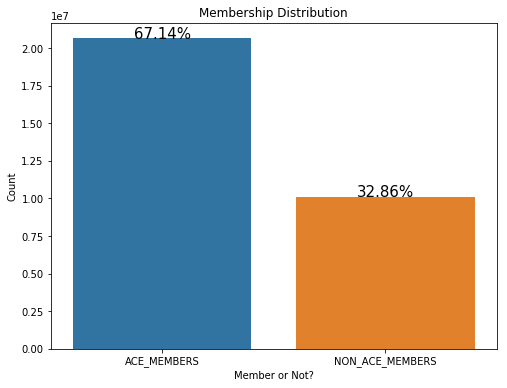

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
_ = ax = sns.barplot(x='columns', y='val', data = df)
_ = ax.set_title("Membership Distribution")
_ = ax.set(xlabel='Member or Not?', ylabel='Count')
for p in ax.patches:
    height = p.get_height()
    _ = ax.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/train_data_df.shape[0] * 100),
            ha="center", fontsize=15)

In [121]:
grp = train_data_df.groupby(by='Store #')
store_name = []
ace_members_count = []
non_ace_members_count = []
for name,val in grp:
    store_name.append(name)
    ace_members_count.append(val[val['Loyalty ID']!="NaN"].shape[0])
    non_ace_members_count.append(val[val['Loyalty ID']=="NaN"].shape[0])

In [122]:
df=pd.DataFrame({'store':store_name,'ace_members':np.log2(ace_members_count),'non_ace_members':np.log2(non_ace_members_count)})

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


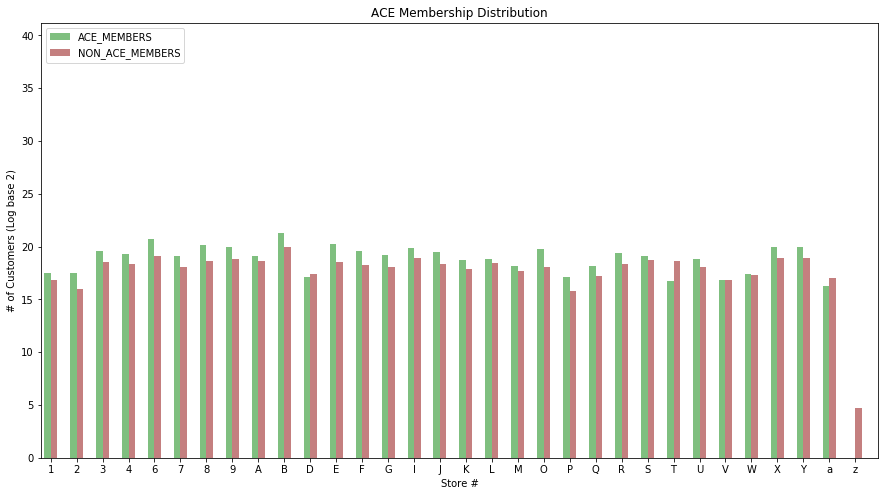

In [123]:
# Setting the positions and width for the bars
pos = list(range(len(df['store']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,8))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['ace_members'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#008000') 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['non_ace_members'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#8B0000') 

# Set the y axis label
ax.set_ylabel('# of Customers (Log base 2)')

ax.set_xlabel('Store #')

# Set the chart's title
ax.set_title('ACE Membership Distribution')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['store'])
plt.grid(None)
# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['ace_members'] + df['non_ace_members'])] )
#plt.yticks([])
# Adding the legend and showing the plot
plt.legend(['ACE_MEMBERS', 'NON_ACE_MEMBERS'], loc='upper left')
plt.grid()
plt.show()

In [124]:
import gc
del grp
gc.collect()

2054

In [126]:
ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].head(2)

,Customer Number,Item Number,Receipt Number,Store #,Loyalty ID,Gross Margin,Gross Margin %
0,88806,B05481X,4297,P,1.98203e+09,37.68,31.41
1,88806,B05482X,4297,P,1.98203e+09,28.46,35.58


In [127]:
ace_df = ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].groupby(['Store #','Receipt Number']).agg({'Gross Margin': 'mean'}).reset_index()

In [128]:
nonace_df = non_ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].groupby(['Store #','Receipt Number']).agg({'Gross Margin': 'mean'}).reset_index()

In [129]:
result_sales_nonace = nonace_df.groupby('Store #')
result_sales_ace = ace_df.groupby('Store #')

In [130]:
store = []
avg = []
typ = []
for name,grp in result_sales_nonace:
    print(name,grp['Gross Margin'].mean())
    store.append(name)
    avg.append(grp['Gross Margin'].mean())
    typ.append("NON_ACE")

for name,grp in result_sales_ace:
    print(name,grp['Gross Margin'].mean())
    store.append(name)
    avg.append(grp['Gross Margin'].mean())
    typ.append("ACE")

1 4.669644966496732
2 5.284271106949171
3 5.409247331123569
4 5.227673128482545
6 5.304920401714292
7 4.684497182075183
8 5.13109524110364
9 5.154374775291327
A 5.021931816415719
B 5.3927860921480395
D 3.8117794428729024
E 4.871822677953632
F 5.2347516751587735
G 4.743187531952104
I 5.366404486432404
J 5.021986093404638
K 4.690038905542359
L 5.196814402673982
M 5.101522679145774
O 5.003599977361662
P 9.607368721735915
Q 4.8885930597609635
R 5.105307045864795
S 4.908791239555109
T 5.469742429523495
U 4.936258372455879
V 4.555097361353644
W 5.309936453482948
X 4.869120734381068
Y 5.4633469989013115
a 5.087587185780118
z -1.4583928571428575
1 4.911641693753118
2 6.630247471955546
3 5.491209015306137
4 5.5833091886826
6 5.010007765964125
7 4.787007169290333
8 5.126665728053461
9 4.915196121429715
A 4.6106689832920456
B 5.008483438973865
D 4.6112315353605
E 4.894203938854863
F 5.079592598795888
G 4.731290012831567
I 5.159330670404045
J 5.03184743384825
K 4.795162694326559
L 4.92080889144260

In [131]:
datafr = pd.DataFrame({"store":store,"avg":avg,"type":typ})

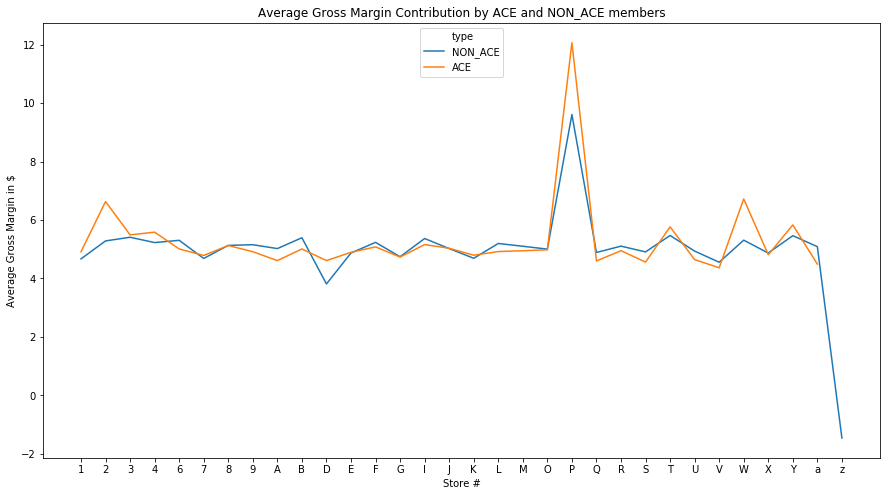

In [132]:
ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="store", y="avg", hue="type",data=datafr)
ax.set_title('Average Gross Margin Contribution by ACE and NON_ACE members')
ax.set_ylabel('Average Gross Margin in $')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

In [133]:
grpby_nonace = non_ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})
grpby_ace = ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})
resultna = grpby_nonace.groupby('Store #')
resulta = grpby_ace.groupby('Store #')

In [134]:
store = []
avg = []
typ = []
for name,grp in resultna:
    print(name,grp['count'].mean())
    store.append(name)
    avg.append(grp['count'].mean())
    typ.append("NON_ACE")
for name,grp in resulta:
    print(name,grp['count'].mean())
    store.append(name)
    avg.append(grp['count'].mean())
    typ.append("ACE")

1 1.6705055823841637
2 1.883678318875433
3 1.8269966889318456
4 1.9611190826476803
6 2.2205826515481553
7 1.8407955054630682
8 1.9996709412049358
9 2.028315765789155
A 2.0115355943033624
B 2.5971524201320166
D 2.9769498278664175
E 1.9395325412161328
F 1.9673883539068053
G 1.919406266429064
I 2.06968251508692
J 2.0098627016008153
K 1.8020178096307347
L 2.000698916107152
M 1.8865406607655804
O 2.1702784666171757
P 2.188132917484887
Q 2.1188365051903113
R 2.146425281423746
S 2.1457038363710246
T 1.8395165430024734
U 2.22365801129668
V 2.0966474029936464
W 1.8467135496448963
X 2.1394751099295695
Y 2.3977464497416925
a 2.4406280846707857
z 1.9285714285714286
1 2.0222445387497707
2 2.709103494999779
3 2.0520452797233864
4 2.3504842749998143
6 2.65594178697175
7 2.0898211410418206
8 2.287991709079775
9 2.319315143989444
A 2.24559535182372
B 2.809177053282859
D 2.5014173396801627
E 2.230768019235918
F 2.18039695140416
G 2.1928109205989323
I 2.316005253104107
J 2.2927701218901015
K 2.0265505551

In [135]:
datafr = pd.DataFrame({"store":store,"avg":avg,"type":typ})

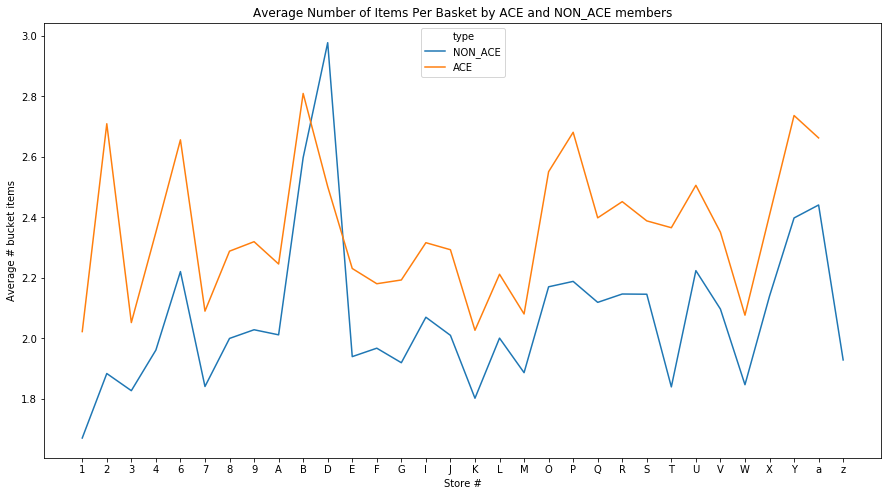

In [136]:
ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="store", y="avg", hue="type",data=datafr)
ax.set_title('Average Number of Items Per Basket by ACE and NON_ACE members')
ax.set_ylabel('Average # bucket items')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

In [137]:
#Store wise return ratio
returndf = train_data_df[train_data_df['Line Item Transaction Type']=='Return']
saledf = train_data_df[train_data_df['Line Item Transaction Type']=='Sale']

In [138]:
retstore = returndf.groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})
salestore = saledf.groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})

In [139]:
result_ret = retstore.groupby('Store #')
result_sale = salestore.groupby('Store #')

In [140]:
storeretlist = []
avgretlist = []
storesalelist = []
avgsalelist = []
for name,grp in result_ret:
    print(name,grp['count'].mean())
    storeretlist.append(name)
    avgretlist.append(grp['count'].mean())

for name,grp in result_sale:
    print(name,grp['count'].mean())
    storesalelist.append(name)
    avgsalelist.append(grp['count'].mean())

1 1.3836544250451535
2 1.4647608264930654
3 1.40114677429688
4 1.4020415636729837
6 1.4319518292897637
7 1.3675324675324676
8 1.3917746316371415
9 1.3548716118010047
A 1.382202523013979
B 1.4950025071034598
D 1.412468940591823
E 1.3826750311482219
F 1.4032150033489619
G 1.3761229198370233
I 1.3886688210153237
J 1.4033200122963418
K 1.3304559954963409
L 1.3652008686210642
M 1.4329363926808016
O 1.387261698440208
P 1.545199719691661
Q 1.372936375440549
R 1.4042178574223336
S 1.4148484718590595
T 1.2614226841067908
U 1.4318089842169162
V 1.3907617504051863
W 1.3099518459069022
X 1.2122502826988315
Y 1.2652979658806454
a 1.392393736017897
z 2.0
1 1.8430952678236983
2 2.411579249068501
3 1.956161249051582
4 2.19221871663984
6 2.5844950669012507
7 1.987338214592946
8 2.1932783452606093
9 2.2183387798884913
A 2.1352715274650422
B 2.9822704305445638
D 2.75039212308585
E 2.1457207866874946
F 2.1019091197243194
G 2.0843597444652064
I 2.2152117436376018
J 2.1837621512277656
K 1.9281531716352298
L

In [141]:
datafr = pd.DataFrame({"store":storeretlist,"ret":avgretlist,"sale":avgsalelist})

In [142]:
datafr['RetToSales'] = datafr['ret']/datafr['sale']

In [143]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

x = datafr['RetToSales'].values.astype(float).reshape(-1,1)

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

datafr['Norm'] = df_normalized

No handles with labels found to put in legend.


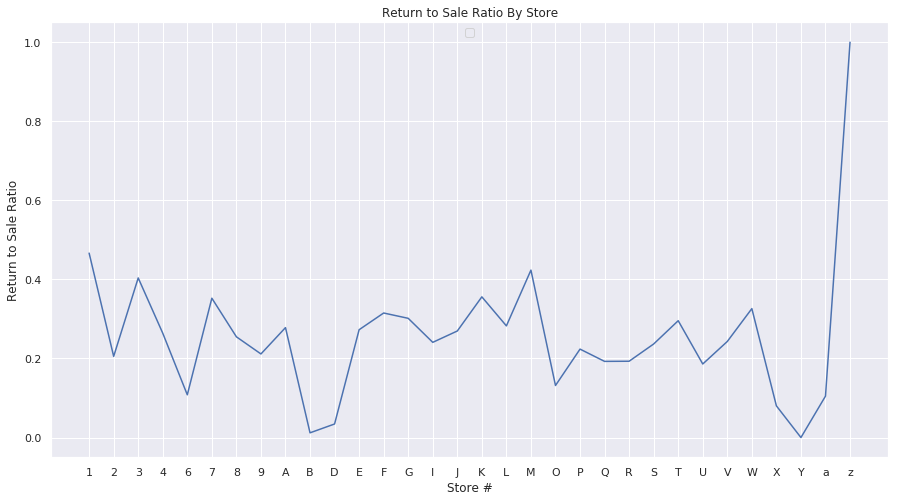

In [144]:
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt

ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="store", y="Norm", data=datafr)
ax.set_title('Return to Sale Ratio By Store')
ax.set_ylabel('Return to Sale Ratio')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

In [145]:
#return by ace membership
non_ace_customers_ret_df = returndf[returndf['Loyalty ID']=="NaN"]
non_ace_customers_sale_df = saledf[saledf['Loyalty ID']=="NaN"]

ace_customers_ret_df = returndf[returndf['Loyalty ID']!="NaN"]
ace_customers_sale_df = saledf[saledf['Loyalty ID']!="NaN"]

na_retstore = non_ace_customers_ret_df.groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})
na_salestore = non_ace_customers_sale_df.groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})

ace_retstore = ace_customers_ret_df.groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})
ace_salestore = ace_customers_sale_df.groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})

na_result_ret = na_retstore.groupby('Store #')
na_result_sale = na_salestore.groupby('Store #')

ace_result_ret = ace_retstore.groupby('Store #')
ace_result_sale = ace_salestore.groupby('Store #')

In [146]:
storeretlist = []
avgretlist = []
storesalelist = []
avgsalelist = []
for name,grp in na_result_ret:
    print(name,grp['count'].mean())
    storeretlist.append(name)
    avgretlist.append(grp['count'].mean())
for name,grp in na_result_sale:
    print(name,grp['count'].mean())
    avgsalelist.append(grp['count'].mean())

1 1.288852725793328
2 1.4091324200913242
3 1.3958239784463404
4 1.3553191489361702
6 1.4138570465273095
7 1.3932986919906827
8 1.3555648623180818
9 1.34559811827957
A 1.3811080523055748
B 1.4693693306392674
D 1.428099173553719
E 1.3708149779735683
F 1.3941229930324144
G 1.3181013106624158
I 1.3753395341180343
J 1.395733890214797
K 1.3387947269303202
L 1.3685159500693482
M 1.4073965794474492
O 1.343143265890047
P 1.7171875
Q 1.3511640798226163
R 1.398661567877629
S 1.4103622664877697
T 1.2313183649971216
U 1.3979074709825077
V 1.3618951612903225
W 1.3251454427925016
X 1.3442837050431986
Y 1.4229077825159915
a 1.3969265367316341
z 2.0
1 1.6505851102017375
2 1.869963530269876
3 1.8107342270323454
4 1.9507177391217665
6 2.212168287456733
7 1.8227881203794014
8 1.9895855674319545
9 2.025359582883855
A 2.0056664799705324
B 2.5844792397645158
D 2.9927937915742793
E 1.9280466861722427
F 1.957173419083939
G 1.9078072798840149
I 2.059145066844399
J 1.9984184518058572
K 1.7847009384182755
L 1.987

In [147]:
datafr = pd.DataFrame({"store":storeretlist,"na_ret":avgretlist,"na_sale":avgsalelist})

In [148]:
storeretlist = []
avgretlist = []
storesalelist = []
avgsalelist = []
for name,grp in ace_result_ret:
    print(name,grp['count'].mean())
    storeretlist.append(name)
    avgretlist.append(grp['count'].mean())
for name,grp in ace_result_sale:
    print(name,grp['count'].mean())
    avgsalelist.append(grp['count'].mean())
  

1 1.4393215480172001
2 1.4897456931911404
3 1.403272075302555
4 1.4243038659097054
6 1.4347497555338253
7 1.357012217426293
8 1.4025645825533508
9 1.3589133379709295
A 1.3829210437139952
B 1.4945741532390662
D 1.4016079632465543
E 1.3856118247020643
F 1.4061760063141278
G 1.3983701188455009
I 1.3948442207222667
J 1.4059523809523808
K 1.3263088882644938
L 1.3630686886708296
M 1.4497782918835551
O 1.3991312475944355
P 1.495483288166215
Q 1.3838862559241707
R 1.4064487826277692
S 1.4180351906158357
T 1.3669761808639482
U 1.4503577817531306
V 1.4176581089542892
W 1.2949617346938775
X 1.1817612397346078
Y 1.1925855337985307
a 1.3856825749167592
1 1.9911857292759707
2 2.6890413415837147
3 2.0338341320889564
4 2.341248390011342
6 2.646096630540614
7 2.0743076152978355
8 2.2766082479906466
9 2.3208300708515557
A 2.2406670332285623
B 2.8071087849083645
D 2.501075901642359
E 2.2205507208349733
F 2.165672471827894
G 2.179092866726045
I 2.304627156930569
J 2.2784709818620916
K 2.0127716479666007
L

In [149]:
datafr['ace_ret'] = pd.DataFrame(avgretlist)
datafr['ace_sale'] = pd.DataFrame(avgsalelist)
datafr['RetToSales_NONACE'] = datafr['na_ret']/datafr['na_sale']
datafr['RetToSales_ACE'] = datafr['ace_ret']/datafr['ace_sale']
datafr = datafr.fillna(0)

x = datafr['RetToSales_NONACE'].values.astype(float).reshape(-1,1)
y = datafr['RetToSales_ACE'].values.astype(float).reshape(-1,1)

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
y_scaled = min_max_scaler.fit_transform(y)
# Run the normalizer on the dataframe
datafr['Non_ACE'] = pd.DataFrame(x_scaled)
datafr['Ace'] = pd.DataFrame(y_scaled)

<Figure size 1080x576 with 0 Axes>

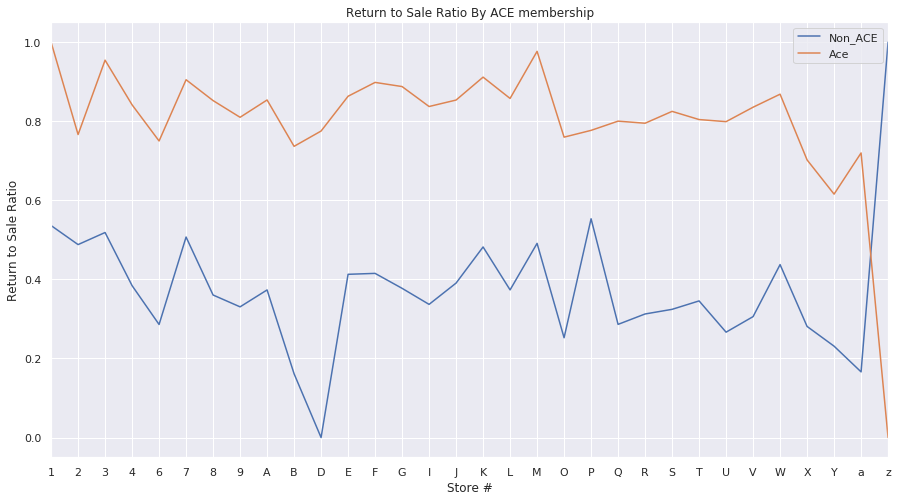

In [150]:
plt.figure(figsize=(15,8))
ax = datafr.plot(x="store", y=["Non_ACE", "Ace"],figsize=(15,8), grid=True)
x = datafr['store']
plt.xticks(range(0,len(x)),x,rotation=0)
ax.set_title('Return to Sale Ratio By ACE membership')
ax.set_ylabel('Return to Sale Ratio')
ax.set_xlabel('Store #')
plt.show()

In [152]:
act = ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].groupby(['Loyalty ID','Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})

In [153]:
repo = act.groupby('Loyalty ID').size().reset_index().rename(columns={0:'count'})

In [154]:
actt = ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].groupby(['Loyalty ID','Store #','Receipt Number']).agg({'Gross Margin': 'sum'}).reset_index()

In [155]:
repos = actt.groupby('Loyalty ID').agg({'Gross Margin': 'sum'}).reset_index()

In [156]:
repos['count'] = repo['count']

In [157]:
reppdf = repos[(repos['Gross Margin']>0) & (repos['count']>1)]
avg_repeating_customer = reppdf['count'].median()
ace_rep_cust_margin = reppdf['Gross Margin'].sum()

In [158]:
print(avg_repeating_customer,ace_rep_cust_margin)

10.0 96626867.17999999


In [159]:
non_ace_cust_margin = non_ace_cust['Gross Margin'].sum()
total = non_ace_cust_margin + ace_rep_cust_margin
print(ace_rep_cust_margin/total*100)

66.4498417871669


In [161]:
print("Average number of visits by ACE member in 2 year period",reppdf['count'].median())
print("Average margin offered by ACE member in 2 year period",reppdf['Gross Margin'].mean())

Average number of visits by ACE member in 2 year period 10.0
Average margin offered by ACE member in 2 year period 246.63175095587894


# APRIORI

In [69]:
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
import sys

In [70]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().as_matrix()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

In [71]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [72]:
non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']


def size(obj):
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

def set_order_store_df(name):
  orders = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']==name].set_index('Receipt Number')['Item Number'].rename('item_id')
  print('dimensions: {0};   size: {1};   unique_orders: {2};   unique_items: {3}'
      .format(orders.shape, size(orders), len(orders.index.unique()), len(orders.value_counts())))
  return orders

def set_order_dyn_promo_store_df(name):
  orders = train_data[~train_data['Department Name'].isin(non_items_dept)][~train_data["Dynamic Promo ID"].isnull()]\
  [train_data['Dynamic Promo ID']>0][train_data['Store #']==name].set_index('Receipt Number')['Item Number'].rename('item_id')
  print('dimensions: {0};   size: {1};   unique_orders: {2};   unique_items: {3}'
      .format(orders.shape, size(orders), len(orders.index.unique()), len(orders.value_counts())))
  return orders

In [ ]:
temp = train_data.groupby(['Item Number','Item Description']).size().reset_index().rename(columns={0:'count'})
temp = temp[['Item Number','Item Description']]
temp = temp.rename(columns={'Item Number':'item_id', 'Item Description':'item_name'})

In [ ]:
# temp.head()

In [ ]:
orders = set_order_store_df("B")

In [ ]:
# orders

In [ ]:
# %%time
rules = association_rules(orders, 0.001)

In [ ]:
rules_final = merge_item_name(rules, temp).sort_values('lift', ascending=False)
display(rules_final[rules_final['itemA']!=rules_final['itemB']].head(10))

In [ ]:
orders = set_order_store_df("6")

In [ ]:
# %%time
rules = association_rules(orders, 0.001)

In [ ]:
rules_final = merge_item_name(rules, temp).sort_values('lift', ascending=False)
display(rules_final[rules_final['itemA']!=rules_final['itemB']].head(10))

In [ ]:
import gc
del rules_final, rules, temp
gc.collect()

# APRIORI and FP ALGO 

## STORE # 1

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules


def get_rules_for_store(store_name):
    print("------------------------------------------------------------------------")
    print("STORE # {0}".format(store_name))
    print("------------------------------------------------------------------------")
    
    no_of_items = len(train_data[~train_data['Department Name'].isin(non_items_dept)]\
                      [train_data['Store #']==store_name]["Item Description"].unique().tolist())
    
    test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']==store_name]\
            .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')
    
    dataset=[]

    for index, row in test.iterrows():
        dataset.append(row['Items'])

    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
    rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
    rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
    print(rules)

In [ ]:
stores = ['P', '7', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J',\
          'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']

for store in stores:
    get_rules_for_store(store)

# get_rules_for_store("1")

In [ ]:
print(train_data["Store #"].unique().tolist())

# FP by Anandh

In [73]:
! sudo pip install mlxtend

In [74]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

In [75]:
    test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='M']\
            .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')
    
    dataset=[]

    for index, row in test.iterrows():
        dataset.append(row['Items'])

    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
    rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
    rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [76]:
pd.set_option('display.max_rows', None)

In [77]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.007467,0.011607,0.001285,0.172071,14.825271,0.001198,1.193814
0,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.011607,0.007467,0.001285,0.110700,14.825271,0.001198,1.116083


In [78]:
import gc
del test, df, rules
gc.collect()

10964

In [79]:
    test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='P']\
            .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')
    
    dataset=[]

    for index, row in test.iterrows():
        dataset.append(row['Items'])

    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
    rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
    rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
    rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,(PAIL PAINT HANDY),(HANDY PAINT PAIL LINERS),0.001418,0.005220,0.001142,0.805310,154.265210,0.001135,5.109550
34,(GLASSSCRAPER GS50 ALLWAY),(STRT EDGE RAZOR BLADE .009 5 PK),0.002372,0.003639,0.001631,0.687831,189.008758,0.001623,3.191732
90,(SUPERHIDE LATEX SGBONE WHITE G),(SUPERHIDE LAT FLAT BONE WHITE 5),0.002033,0.004631,0.001368,0.672840,145.305982,0.001358,3.042450
70,"(PLASTIC DEEP WELL TRAY, CEILING WB U-FLT WHT ...",(REG SEL INT MATTE BS1 5G),0.001518,0.005045,0.001004,0.661157,131.062045,0.000996,2.936332
68,"(PLASTIC DEEP WELL TRAY, REG SEL INT MATTE BS1...",(CEILING WB U-FLT WHT 5GL),0.001606,0.005848,0.001004,0.625000,106.879024,0.000995,2.651073
144,(COLOR TESTER ROLLER KIT),(COLOR SAMPLE BM BASE1 PT),0.010240,0.048852,0.006124,0.598039,12.241754,0.005624,2.366270
113,"(MOHAIR ROLR COVER1/4""2PK)","(JUMBO KOTER 4.5"" FRAME)",0.003087,0.003614,0.001769,0.573171,158.595147,0.001758,2.334390
57,"(DEEP PLASTIC PNT ROLLR TRAY 9"")",(PLASTIC DEEP WELL TRAY),0.008031,0.030167,0.004342,0.540625,17.920909,0.004100,2.111200
112,"(JUMBO KOTER 4.5"" FRAME)","(MOHAIR ROLR COVER1/4""2PK)",0.003614,0.003087,0.001769,0.489583,158.595147,0.001758,1.953136
69,"(CEILING WB U-FLT WHT 5GL, REG SEL INT MATTE B...",(PLASTIC DEEP WELL TRAY),0.002171,0.030167,0.001004,0.462428,15.328787,0.000938,1.804097


In [80]:
import gc
del test, df, rules
gc.collect()

150306

In [81]:
    test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='X']\
            .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')
    
    dataset=[]

    for index, row in test.iterrows():
        dataset.append(row['Items'])

    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
    rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
    rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
    rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,"(ORANGE BURST SUET, PEANUT CRUNCH SUET)",(BERRY BLAST SUET),0.001358,0.003130,0.001008,0.742188,237.118304,0.001004,3.866647
24,"(ORANGE BURST SUET, BIRD BLEND SUET)",(BERRY BLAST SUET),0.001431,0.003130,0.001047,0.731992,233.860835,0.001043,3.719546
17,"(BERRY BLAST SUET, PEANUT CRUNCH SUET)",(ORANGE BURST SUET),0.001525,0.002566,0.001008,0.661034,257.595461,0.001004,2.942576
22,"(BERRY BLAST SUET, ORANGE BURST SUET)",(BIRD BLEND SUET),0.001599,0.003808,0.001047,0.654976,172.019409,0.001041,2.887316
16,"(BERRY BLAST SUET, ORANGE BURST SUET)",(PEANUT CRUNCH SUET),0.001599,0.002719,0.001008,0.630332,231.802570,0.001004,2.697772
13,(ORANGE BURST SUET),(BERRY BLAST SUET),0.002566,0.003130,0.001599,0.623154,199.088853,0.001591,2.645299
23,"(BERRY BLAST SUET, BIRD BLEND SUET)",(ORANGE BURST SUET),0.001755,0.002566,0.001047,0.596718,232.532697,0.001043,2.473294
36,(BERRY BLAST SUET),(BIRD BLEND SUET),0.003130,0.003808,0.001755,0.560775,147.278844,0.001743,2.268068
5,(PEANUT CRUNCH SUET),(BERRY BLAST SUET),0.002719,0.003130,0.001525,0.560758,179.154197,0.001516,2.269524
34,(ORANGE BURST SUET),(BIRD BLEND SUET),0.002566,0.003808,0.001431,0.557590,146.442421,0.001421,2.251741


In [82]:
import gc
del test, df, rules
gc.collect()

42461

In [83]:
    test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='O']\
            .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')
    
    dataset=[]

    for index, row in test.iterrows():
        dataset.append(row['Items'])

    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
    rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
    rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
    rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,"(SPRING ANNUALS 6"" POT)","(SPRING ANNUALS 4 1/2""POTS)",0.004646,0.013852,0.001473,0.316942,22.880775,0.001408,1.443726
11,"(VIGOROUS VEGGIES 3 1/4"" POTS)",(ASSORTED CELL PACKS $2.49),0.004194,0.018334,0.001196,0.285290,15.560524,0.001119,1.373516
1,"(SPRING ANNUALS 4 1/2""POTS)",(ASSORTED CELL PACKS $2.49),0.013852,0.018334,0.003951,0.285200,15.555639,0.003697,1.373344
19,"(HERBS 3 1/2"" POTS)",(ASSORTED CELL PACKS $2.49),0.005814,0.018334,0.001547,0.266166,14.517487,0.001441,1.337723
21,"(VIGOROUS VEGGIES 3 1/4"" POTS)","(HERBS 3 1/2"" POTS)",0.004194,0.005814,0.001053,0.251114,43.193653,0.001029,1.327554
0,(ASSORTED CELL PACKS $2.49),"(SPRING ANNUALS 4 1/2""POTS)",0.018334,0.013852,0.003951,0.215475,15.555639,0.003697,1.257001
2,"(HERBS 3 1/2"" POTS)","(SPRING ANNUALS 4 1/2""POTS)",0.005814,0.013852,0.001252,0.215434,15.552667,0.001172,1.256935
20,"(HERBS 3 1/2"" POTS)","(VIGOROUS VEGGIES 3 1/4"" POTS)",0.005814,0.004194,0.001053,0.181136,43.193653,0.001029,1.216083
12,(FASTENERS),(CMN Donations),0.041464,0.097132,0.004837,0.116666,1.201111,0.000810,1.022114
17,(BIRDSEED WILDBIRD 20#ACE),(CMN Donations),0.015256,0.097132,0.001753,0.114908,1.183015,0.000271,1.020084


In [84]:
import gc
del test, df, rules
gc.collect()

22661

In [85]:
train_data

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
0,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05481X,REG SEL INT MATTE BS1 GL,3.0,119.97,82.29,37.68,31.41,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,1.0,Sale,Category Price Plan,NaN
1,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05482X,REG SEL INT MATTE BS2 GL,2.0,79.98,51.52,28.46,35.58,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN


In [91]:
train_data[train_data['Store Name']=='15784 EI PAINT']['Department Name'].unique()

array(['PAINT & PAINT SUPPLIES', 'HOUSEWARES & GIFTS',
       'HAND TOOLS & TOOL ACCESSORIES', 'AUTOMOTIVE', 'CLEANING SUPPLIES',
       'NOTIONS & MISCELLANEOUS', 'IN STORE COUPONS',
       'BUILDING MATERIALS & PRODUCTS', 'HEATING & COOLING SUPPLIES',
       'HARDWARE', 'APPLIANCES & HOME ENTERTAINMENT',
       'FLASHLIGHTS, LIGHTING & SUPPLIES', 'STATIONARY & STORE SUPPLIES',
       'SPORTING GOODS', 'LAWN, GARDEN & FARM SUPPLIES',
       'ELECTRICAL SUPPLIES', 'FASTENERS', 'POWER TOOLS & ACCESSORIES',
       'DONTATIONS', 'PLUMBING SUPPLIES & FIXTURES',
       'COSTELLOS GIFT CARD', 'DELIVERY & UPS', 'UNIFORM',
       'ACE REWARDS INSTANT SAVINGS', 'CREDIT CARD REFUND',
       'OUTDOOR EQUIPMENT & POWER TOOLS', 'NON-ACE INSTANT SAVINGS',
       'OUTDOOR LIVING & FURNITURE', 'SPECIAL ORDER',
       'GIFT CARD OFFSET (SPECL PROMO)', 'COMMERCIAL AND INDUSTRIAL'],
      dtype=object)

In [95]:
train_data[train_data['Item Description']=='ASSORTED CELL PACKS $2.49'].head(2)
#VIGOROUS VEGGIES 3 1/4" POTS

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
183736,4/11/2015,9:53:09,*35992,B21512,O,15863 COPIAGUE,OTHER,FLATS249,ASSORTED CELL PACKS $2.49,4.0,9.96,4.2,5.76,57.83,70,"LAWN, GARDEN & FARM SUPPLIES",799,NURSERY/LIVE GOODS,79901,FLOWER FLATS,5.0,NaN,*,0.0,2.49,2.49,0.0,Y,Cash Tender,0.0,11701,4249,1.90404e+09,LAUREN LEMMO,Sale,1.0,Sale,Retail,NaN
187555,4/11/2015,10:56:17,141069,B21564,O,15863 COPIAGUE,OTHER,FLATS249,ASSORTED CELL PACKS $2.49,8.0,14.99,8.4,6.59,43.96,70,"LAWN, GARDEN & FARM SUPPLIES",799,NURSERY/LIVE GOODS,79901,FLOWER FLATS,5.0,NaN,Q,0.0,14.99,2.49,12.5,Y,Bankcard Tender,-12.5,11758,2149,1.91392e+09,LAUREN LEMMO,Sale,1.0,Sale,Multiple Selling Price,NaN


In [96]:
train_data[train_data['Item Description']=='VIGOROUS VEGGIES 3 1/4" POTS'].head(2)


,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
450411,4/21/2015,8:38:49,6530,2691,O,15863 COPIAGUE,8.98902E+11,VEG314,"VIGOROUS VEGGIES 3 1/4"" POTS",2.0,5.38,2.15,3.23,60.04,70,"LAWN, GARDEN & FARM SUPPLIES",799,NURSERY/LIVE GOODS,79906,VEGETABLES,1.0,NaN,NaN,0.0,2.69,2.99,0.3,N,Charge Tender,0.3,11804,NaN,1.98174e+09,KATHRYN GIANNELLI,Sale,1.0,Sale,Category Price Plan,NaN
452340,4/21/2015,10:25:03,230128,B26144,O,15863 COPIAGUE,8.98902E+11,VEG314,"VIGOROUS VEGGIES 3 1/4"" POTS",4.0,11.96,4.30,7.66,64.05,70,"LAWN, GARDEN & FARM SUPPLIES",799,NURSERY/LIVE GOODS,79906,VEGETABLES,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Cash Tender,0.0,11757,6442,1.91935e+09,KATHRYN GIANNELLI,Sale,1.0,Sale,Retail,NaN


## FP ALGO

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
frq_items

In [ ]:
from mlxtend.frequent_patterns import association_rules 

rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

## APRIORI

In [ ]:
from mlxtend.frequent_patterns import apriori

frq_items = apriori(df, min_support=0.001, use_colnames=True)
frq_items

In [ ]:
from mlxtend.frequent_patterns import association_rules 

rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rule

In [ ]:
!sudo pip install efficient-apriori


In [ ]:
!sudo pip install apyori

In [ ]:
from apyori import apriori

association_rules = apriori(dataset, min_support=0.001, min_confidence=0.1, min_length=2)
association_results = list(association_rules)
association_results

# SARIMA

In [ ]:
train_data = train_data[~train_data['Department Name'].isin(non_items_dept)]

In [ ]:
sum_df = train_data.groupby(['Item Description']).agg({'Gross Margin':'sum'})
sum_df = sum_df.sort_values('Gross Margin',ascending=False)
sum_df = sum_df[:10]
ax =plt.subplot()
sum_df.plot.bar(ax=ax)
ax.set_xlabel('Item Description')
ax.set_ylabel('Total Gross Margin')
ax.set_title('Top 10 Products with highest total gross margin')
plt.show()

In [ ]:
sales_count = train_data.groupby(['Item Description']).agg({'Net Sales Units':'sum'})
sales_count = sales_count.sort_values('Net Sales Units',ascending=False)
sales_count = sales_count[:10]
ax = plt.subplot()
sales_count[:10].plot.bar(ax = ax)
ax.set_xlabel('Item Description')
ax.set_ylabel('Net Sales Count')
ax.set_title('Top 10 Products with most number of sales')
plt.show()

In [ ]:
train_data_9  = train_data[train_data['Store #'] == '9']
train_data_T  = train_data[train_data['Store #'] == 'T']

In [ ]:
import datetime
datetime.date(2010, 6, 16).strftime("%V")

In [ ]:
x = pd.DatetimeIndex(train_data_9['Date']).weekofyear

In [ ]:
print(pd.unique(x))

In [ ]:
sales_count_9 = train_data_9.groupby(['Item Description']).agg({'Net Sales Units':'sum'})
sales_count_9 = sales_count_9.sort_values('Net Sales Units',ascending=False)
sales_count_9 = sales_count_9[:10]
ax = plt.subplot()
sales_count_9.plot.bar(ax = ax)
ax.set_xlabel('Item Description')
ax.set_ylabel('Net Sales Count')
ax.set_title('Top 10 Products with most number of sales for Store # 9')
plt.show()

In [ ]:
train_data_9['Month'] = pd.DatetimeIndex(train_data_9['Date']).month
train_data_9['Year'] = pd.DatetimeIndex(train_data_9['Date']).year
train_data_9['Week'] = pd.DatetimeIndex(train_data_9['Date']).weekofyear
train_data_T['Month'] = pd.DatetimeIndex(train_data_T['Date']).month
train_data_T['Year'] = pd.DatetimeIndex(train_data_T['Date']).year

In [ ]:
train_data_9_56  = train_data_9[train_data_9['Item Number'] == '56']
train_data_9_56_year = train_data_9_56.groupby('Year')
train_data_9_56_15 = train_data_9_56_year.get_group(2015)
train_data_9_56_16 = train_data_9_56_year.get_group(2016)
train_data_9_56_17 = train_data_9_56_year.get_group(2017)
# train_year_17_T['Item Number'].value_counts()
train_data_9_56_18 = train_data_9_56_year.get_group(2018)
# train_year_18_T['Item Number'].value_counts()


In [ ]:
monthcount_15 = train_data_9_56_15.groupby(['Month']).agg({'Net Sales Units':'sum'})
train_data_9_56_16['Month'] = train_data_9_56_16['Month'] + 12
monthcount_16 = train_data_9_56_16.groupby(['Month']).agg({'Net Sales Units':'sum'})
train_data_9_56_17['Month'] = train_data_9_56_17['Month'] + 24
monthcount_17 = train_data_9_56_17.groupby(['Month']).agg({'Net Sales Units':'sum'})
train_data_9_56_18['Month'] = train_data_9_56_18['Month'] + 36
monthcount_18 = train_data_9_56_18.groupby(['Month']).agg({'Net Sales Units':'sum'})


monthcount =monthcount_15.append(monthcount_16).append(monthcount_17).append(monthcount_18)
monthcount

In [ ]:
ax = plt.subplot()
monthcount.plot.line(ax =ax)
ax.set_title('Monthly Analysis of Net Sales Units for item number 56 ')
ax.set_xlabel('Month')
ax.set_ylabel('Total Net Sales Units')
plt.show()

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(monthcount[:], label='Original Series')
axes[0].plot(monthcount[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Seasinal Dei
axes[1].plot(monthcount[:], label='Original Series')
axes[1].plot(monthcount[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend( fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('56 Item Number - Monthly Sales', fontsize=16)
plt.show()

In [ ]:
!sudo pip3 install pyramid-arima

In [ ]:
pip install pyramid-arima

In [ ]:
pip install --upgrade numpy

In [ ]:
from pyramid.arima import auto_arima

# Seasonal - fit stepwise auto-ARIMA
smodel = auto_arima(monthcount[:42], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

In [ ]:
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
# Plot
plt.plot(monthcount[42:].values)
plt.plot(fitted, color='darkgreen')
plt.title("Prediction v/s Actual Using SARIMA")
plt.xlabel("Month")
plt.ylabel("Total Net Sales Units")
plt.show()

In [ ]:
weekcount_15 = train_data_9_56_15.groupby(['Week']).agg({'Net Sales Units':'sum'})
train_data_9_56_16['Week'] = train_data_9_56_16['Week'] + 52
weekcount_16 = train_data_9_56_16.groupby(['Week']).agg({'Net Sales Units':'sum'})
train_data_9_56_17['Week'] = train_data_9_56_17['Week'] + 104
weekcount_17 = train_data_9_56_17.groupby(['Week']).agg({'Net Sales Units':'sum'})
train_data_9_56_18['Week'] = train_data_9_56_18['Week'] + 156
weekcount_18 = train_data_9_56_18.groupby(['Week']).agg({'Net Sales Units':'sum'})


weekcount =weekcount_15.append(weekcount_16).append(weekcount_17).append(weekcount_18)
weekcount

In [ ]:
weekcount.describe

In [ ]:
ax = plt.subplot()
weekcount.plot.line(ax =ax)
ax.set_title('Weekly Analysis of Net Sales Units for item number 56 ')
ax.set_xlabel('Week')
ax.set_ylabel('Total Net Sales Units')
plt.show()

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(weekcount[:], label='Original Series')
axes[0].plot(weekcount[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Seasinal Dei
axes[1].plot(weekcount[:], label='Original Series')
axes[1].plot(weekcount[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend( fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('56 Item Number - Weekly Sales', fontsize=16)
plt.show()

In [ ]:
from pyramid.arima import auto_arima

# Seasonal - fit stepwise auto-ARIMA
smodel_week = auto_arima(weekcount[:200], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=52,
                         start_P=0, seasonal=True,
                         d=2, D=2, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_week.summary()

In [ ]:
n_periods = 10
fitted, confint = smodel_week.predict(n_periods=n_periods, return_conf_int=True)
# Plot
plt.plot(weekcount[200:].values)
plt.plot(fitted, color='darkgreen')
plt.title("Prediction v/s Actual Using SARIMA")
plt.xlabel("Week")
plt.ylabel("Total Net Sales Units")
plt.show()

In [ ]:
smodel_less_parameters = auto_arima(weekcount[:200],
                         test='adf', m=52, seasonal=True,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_less_parameters.summary()

In [ ]:
smodel_less_parameters

In [ ]:
n_periods = 10
fitted, confint = smodel_less_parameters.predict(n_periods=n_periods, return_conf_int=True)
# Plot
plt.plot(weekcount[200:].values)
plt.plot(fitted, color='darkgreen')
plt.title("Prediction v/s Actual Using SARIMA")
plt.xlabel("Week")
plt.ylabel("Total Net Sales Units")
plt.show()

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(weekcount[:], label='Original Series')
axes[0].plot(weekcount[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Seasinal Dei
axes[1].plot(weekcount[:], label='Original Series')
axes[1].plot(weekcount[:].diff(52), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend( fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('56 Item Number - Weekly Sales', fontsize=16)
plt.show()

In [ ]:
ax = plt.subplot()
np.log(np.log(weekcount)).plot.line(ax =ax)
ax.set_title('Weekly Analysis of Net Sales Units for item number 56 ')
ax.set_xlabel('Week')
ax.set_ylabel('Total Net Sales Units')
plt.show()

In [ ]:
smodel_less_log = auto_arima(np.log(np.log(weekcount[:200])),
                         test='adf', m=52, seasonal=True,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_less_log.summary()

In [ ]:
n_periods = 10
fitted, confint = smodel_less_log.predict(n_periods=n_periods, return_conf_int=True)
# Plot
plt.plot(np.log(np.log((weekcount[200:].values))))
plt.plot(fitted, color='darkgreen')
plt.title("Prediction v/s Actual Using SARIMA")
plt.xlabel("Week")
plt.ylabel("Total Net Sales Units")
plt.show()

# LSTM

In [ ]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [ ]:
dataset = weekcount #numpy.ndarray
# dataset = dataset.astype('float32')
# dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Training Phase
model.summary()

In [ ]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
Y_test.shape

In [ ]:
aa=[x for x in range(11)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:11], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:11], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Total Net Sales Units')
plt.xlabel('Week')
plt.legend(fontsize=15)
plt.show();

https://www.alkaline-ml.com/pmdarima/tips_and_tricks.html
https://people.duke.edu/~rnau/411arim.htm